## 0. 데이터 불러오기

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.max_columns = 100

import warnings
warnings.filterwarnings('ignore')

In [2]:
train_x = pd.read_csv('data/train/train.csv')
train_y = pd.read_csv('data/train/train_label.csv')
test_x = pd.read_csv('data/test/test.csv')
test_y = pd.read_csv('data/test/test_label.csv')

In [3]:
# EDA 및 전처리 과정 용이하게 하기 위해 합침
train = pd.merge(train_x, train_y)

In [4]:
# EDA 및 전처리 과정 용이하게 하기 위해 합침
test = pd.merge(test_x, test_y)

## 1. train, test 공통 전처리

In [5]:
train.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,F,Y,Y,0,202500.0,Pensioner,Secondary / secondary special,Married,House / apartment,-19031,365243,1,0,0,0,NaN,2,-53,1
1,1,F,N,N,1,157500.0,Working,Higher education,Married,House / apartment,-15773,-309,1,0,1,0,Sales staff,3,-26,0
2,2,M,Y,N,0,135000.0,Working,Secondary / secondary special,Married,House / apartment,-13483,-1816,1,1,1,0,Laborers,2,-9,1
3,3,F,Y,N,2,112500.0,Working,Secondary / secondary special,Married,House / apartment,-12270,-150,1,0,1,0,Security staff,4,-12,1
4,4,M,Y,Y,1,225000.0,Working,Secondary / secondary special,Married,House / apartment,-16175,-2371,1,0,0,0,Drivers,3,-3,1


In [6]:
test.head()

,index,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit
0,0,M,N,Y,0,211500.0,Working,Secondary / secondary special,Single / not married,House / apartment,-10072,-1101,1,1,1,0,Core staff,1,-10,NaN
1,1,F,N,Y,0,157500.0,Pensioner,Secondary / secondary special,Widow,House / apartment,-24340,365243,1,0,1,0,NaN,1,-52,NaN
2,2,F,N,Y,0,45000.0,Commercial associate,Secondary / secondary special,Married,House / apartment,-15724,-1389,1,1,1,0,Sales staff,2,-15,NaN
3,3,M,N,Y,2,270000.0,Working,Secondary / secondary special,Single / not married,House / apartment,-11505,-4019,1,0,0,0,Laborers,3,-24,NaN
4,4,F,N,Y,0,202500.0,Working,Secondary / secondary special,Married,House / apartment,-15929,-2879,1,0,1,0,Laborers,2,-54,NaN


### (1) index 전처리
+ index column은 분류 모델에 무의미하다는 판단 $\to$ drop

In [7]:
train = train.drop(['index'],axis=1)

In [8]:
test = test.drop(['index'],axis=1)

### (2) DAYS_EMPLOYED 전처리
+ 양수 값 : 크기에 상관없이 고용되지 않은 상태를 의미 $\to$ 양수 값에 대한 전처리 : 모두 0으로

In [9]:
# 기존에 'DAYS_EMPLOYED'가 0의 값을 가지는 경우 -> 존재하지 않음
train[train['DAYS_EMPLOYED']==0]

,gender,car,reality,child_num,income_total,income_type,edu_type,family_type,house_type,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,work_phone,phone,email,occyp_type,family_size,begin_month,credit


In [10]:
# 'DAYS_EMPLOYED'값이 0보다 큰 경우 모두 0으로 지정
train.loc[train['DAYS_EMPLOYED']>0, 'DAYS_EMPLOYED'] = 0

In [11]:
# 'DAYS_EMPLOYED'값이 0보다 큰 경우 모두 0으로 지정
test.loc[test['DAYS_EMPLOYED']>0, 'DAYS_EMPLOYED'] = 0

### (3) occyp_type 전처리
+ train : 4132개의 NaN 값 존재
+ test : 4039개의 NaN 값 존재

#### train

In [12]:
# train에서 'occyp_type'가 NaN 값인 크기
train[train['occyp_type'].isnull()].shape

(4132, 19)

In [13]:
# train에서 'DAYS_EMPLOYED'가 0인 값의 크기
a = train[train['DAYS_EMPLOYED']==0]
a.shape

(2247, 19)

In [14]:
# train에서 'DAYS_EMPLOYED'가 0인 것들 중에 'occyp_type'가 NaN 값인 크기
a_1 = a[a['occyp_type'].isnull()]
a_1.shape

(2247, 19)

In [15]:
# train에서 'DAYS_EMPLOYED'가 0이면 'occyp_type'은 NaN 값을 가짐
a_1.equals(a)

True

#### test

In [16]:
# test에서 'occyp_type'가 NaN 값인 크기
test[test['occyp_type'].isnull()].shape

(4039, 19)

In [17]:
# test에서 'DAYS_EMPLOYED'가 0인 값의 크기
b = test[test['DAYS_EMPLOYED']==0]
b.shape

(2191, 19)

In [18]:
# test에서 'DAYS_EMPLOYED'가 0인 것들 중에 'occyp_type'가 NaN 값인 크기
b_1 = b[b['occyp_type'].isnull()]
b_1.shape

(2191, 19)

In [19]:
# test에서 'DAYS_EMPLOYED'가 0이면 'occyp_type'은 NaN 값을 가짐
b_1.equals(b)

True

#### train, test 모두 'DAYS_EMPLOYED'가 0이면 'occyp_type'은 NaN 값을 가짐 : 무직이기에 직업 유형이 결측값을 가지는 것 $\to$ 'None'이라는 값으로 대체

####  'DAYS_EMPLOYED'가 0이 아닌데 'occyp_type'이 NaN 값을 가지는 경우 $\to$ 'Extra'(기타)로 대체

In [20]:
train.loc[(train['DAYS_EMPLOYED'] == 0) & (train['occyp_type'].isnull()), 'occyp_type'] = 'None'

In [21]:
train.loc[(train['DAYS_EMPLOYED'] != 0) & (train['occyp_type'].isnull()), 'occyp_type'] = 'Extra'

In [22]:
test.loc[(test['DAYS_EMPLOYED'] == 0) & (test['occyp_type'].isnull()), 'occyp_type'] = 'None'

In [23]:
test.loc[(test['DAYS_EMPLOYED'] != 0) & (test['occyp_type'].isnull()), 'occyp_type'] = 'Extra'

In [24]:
# 결측치 해결
train.isnull().sum()

gender           0
car              0
reality          0
child_num        0
income_total     0
income_type      0
edu_type         0
family_type      0
house_type       0
DAYS_BIRTH       0
DAYS_EMPLOYED    0
FLAG_MOBIL       0
work_phone       0
phone            0
email            0
occyp_type       0
family_size      0
begin_month      0
credit           0
dtype: int64

In [25]:
# 결측치 해결(실제 예측해야 할 credit 값 제외)
test.isnull().sum()

gender               0
car                  0
reality              0
child_num            0
income_total         0
income_type          0
edu_type             0
family_type          0
house_type           0
DAYS_BIRTH           0
DAYS_EMPLOYED        0
FLAG_MOBIL           0
work_phone           0
phone                0
email                0
occyp_type           0
family_size          0
begin_month          0
credit           13229
dtype: int64

### (4) FLAG_MOBIL 전처리
+ 모두 1이라는 단일 값만을 가짐 $\to$ 분류 모델에 영향이 없을 것이라는 판단 $\to$ 변수 축소(column drop)

In [26]:
train = train.drop(['FLAG_MOBIL'],axis=1)

In [27]:
test = test.drop(['FLAG_MOBIL'],axis=1)

### (5) 범주형 변수 더미화

In [28]:
# train 더미화
train_dum = pd.get_dummies(train, columns = ['gender','car','reality','income_type','edu_type','family_type','house_type','occyp_type'])

In [29]:
# test 더미화
test_dum = pd.get_dummies(test, columns = ['gender','car','reality','income_type','edu_type','family_type','house_type','occyp_type'])

## 2. train 데이터셋 분리 및 추가 전처리(class imbalance)
+ random_state = 42로 통일

In [30]:
# 0과 1의 label 값의 비율 확인 -> 1:7 의 class imbalance 상태 -> 전처리
train_dum['credit'].value_counts()

1    11617
0     1611
Name: credit, dtype: int64

In [31]:
# train_dum -> train:test = 7:3으로 y값의 비율 맞춰(stratify) 분리
from sklearn.model_selection import train_test_split

y = train_dum['credit']
X = train_dum.drop(['credit'],axis=1)

train_X, val_X, train_y, val_y = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

In [32]:
# class imbalance 해결을 위해 SMOTETomek을 이용한 복합 oversamping 진행
# over_X : oversampling된 train_X
# over_y : oversampling된 train_y
from imblearn.combine import *

over_X, over_y = SMOTETomek(random_state=42).fit_resample(train_X, train_y)

In [33]:
# StandardScaler을 이용해 데이터셋 정규화
from sklearn.preprocessing import StandardScaler
sd=StandardScaler()

sd.fit(over_X)
over_X_sd = sd.transform(over_X)
val_X_sd = sd.transform(val_X)

## 3. Modeling

### Deep Neural Network(DNN)

#### MLPClassifier 사용

In [34]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(random_state=42)

In [35]:
# 하이퍼파라미터 탐색
mlp.get_params().keys()

dict_keys(['activation', 'alpha', 'batch_size', 'beta_1', 'beta_2', 'early_stopping', 'epsilon', 'hidden_layer_sizes', 'learning_rate', 'learning_rate_init', 'max_fun', 'max_iter', 'momentum', 'n_iter_no_change', 'nesterovs_momentum', 'power_t', 'random_state', 'shuffle', 'solver', 'tol', 'validation_fraction', 'verbose', 'warm_start'])

In [36]:
# 그리드 서치 -> 하이퍼파라미터 튜닝 진행
from sklearn.model_selection import GridSearchCV

mlp = MLPClassifier(random_state=42)
para1 = {'activation': ['tanh', 'relu']}

mlp = GridSearchCV(estimator = mlp, param_grid = para1, cv=5, scoring='accuracy')
mlp.fit(over_X_sd, over_y)

GridSearchCV(cv=5, estimator=MLPClassifier(random_state=42),
             param_grid={'activation': ['tanh', 'relu']}, scoring='accuracy')

In [37]:
# 최적 하이퍼파라미터 확인
mlp.best_params_

{'activation': 'tanh'}

In [38]:
# 검증 데이터 accuracy 확인
from sklearn.metrics import accuracy_score

mlp = MLPClassifier(activation='tanh', random_state=42).fit(over_X_sd, over_y)
pred = mlp.predict(val_X_sd)
accuracy_score(val_y, pred)

0.8359788359788359

#### DNN 직접 구현

In [39]:
# 모델 구현
from tensorflow import keras
from tensorflow.keras import models
from tensorflow.keras import layers

model = models.Sequential()
model.add(layers.Dense(4, activation='relu', input_shape=(56,)))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(4, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid')) 

In [40]:
# compiling
model.compile(optimizer = 'rmsprop', loss = 'binary_crossentropy', metrics = 'acc')

In [41]:
# earlystopping 생성
early_stopping = keras.callbacks.EarlyStopping(patience=10, min_delta=0.001,restore_best_weights=True)

history = model.fit(over_X_sd, over_y,
                    validation_data=(val_X_sd, val_y),
                    batch_size=32, epochs=100, callbacks=[early_stopping])

Epoch 1/100
472/472 [==============================] - 3s 5ms/step - loss: 0.6148 - acc: 0.7477 - val_loss: 0.4733 - val_acc: 0.8730
Epoch 2/100
472/472 [==============================] - 2s 4ms/step - loss: 0.5082 - acc: 0.8540 - val_loss: 0.4143 - val_acc: 0.8763
Epoch 3/100
472/472 [==============================] - 2s 4ms/step - loss: 0.4497 - acc: 0.8662 - val_loss: 0.4180 - val_acc: 0.8748
Epoch 4/100
472/472 [==============================] - 2s 4ms/step - loss: 0.4094 - acc: 0.8724 - val_loss: 0.4073 - val_acc: 0.8758
Epoch 5/100
472/472 [==============================] - 2s 4ms/step - loss: 0.3814 - acc: 0.8764 - val_loss: 0.4115 - val_acc: 0.8748
Epoch 6/100
472/472 [==============================] - 2s 4ms/step - loss: 0.3622 - acc: 0.8789 - val_loss: 0.4175 - val_acc: 0.8733
Epoch 7/100
472/472 [==============================] - 2s 4ms/step - loss: 0.3490 - acc: 0.8782 - val_loss: 0.4062 - val_acc: 0.8753
Epoch 8/100
472/472 [==============================] - 2s 4ms/step - 

In [42]:
history_dict = history.history
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

Best Validation Loss: 0.40618
Best Validation Accuracy: 0.87629


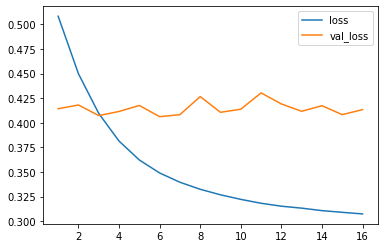

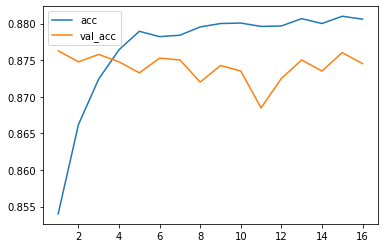

In [43]:
# loss, accuracy 시각화
history_df = pd.DataFrame(history.history)
history_df.loc[1:, ['loss', 'val_loss']].plot()
history_df.loc[1:, ['acc', 'val_acc']].plot()

print(("Best Validation Loss: {:0.5f}" +\
      "\nBest Validation Accuracy: {:0.5f}")\
      .format(history_df['val_loss'].min(), history_df['val_acc'].max()))

### Decision Tree(DT)

In [44]:
# decision tree 클래스 지정
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier(random_state=42)

In [45]:
# 하이퍼파라미터 탐색
dt.get_params().keys()

dict_keys(['ccp_alpha', 'class_weight', 'criterion', 'max_depth', 'max_features', 'max_leaf_nodes', 'min_impurity_decrease', 'min_samples_leaf', 'min_samples_split', 'min_weight_fraction_leaf', 'random_state', 'splitter'])

In [46]:
# 그리드 서치 -> 하이퍼파라미터 튜닝 진행
dt = DecisionTreeClassifier(random_state=42)
para2 = {'criterion':['gini','entropy'], 'max_depth':[5, 10, 15, 20]}

dt = GridSearchCV(estimator = dt, param_grid = para2, cv=5, scoring='accuracy')
dt.fit(over_X_sd, over_y)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [5, 10, 15, 20]},
             scoring='accuracy')

In [47]:
# 최적 하이퍼파라미터 확인
dt.best_params_

{'criterion': 'entropy', 'max_depth': 20}

In [48]:
# 검증 데이터 accuracy 확인
dt = DecisionTreeClassifier(criterion='entropy', max_depth=20, random_state=42)
dt.fit(over_X_sd, over_y)
pred = dt.predict(val_X_sd)
print(accuracy_score(val_y, pred))

0.8133030990173847


### Logistic Regression(LR)

In [49]:
# logistic regression 클래스 지정
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(random_state=42)

In [50]:
# 하이퍼파라미터 탐색
lr.get_params().keys()

dict_keys(['C', 'class_weight', 'dual', 'fit_intercept', 'intercept_scaling', 'l1_ratio', 'max_iter', 'multi_class', 'n_jobs', 'penalty', 'random_state', 'solver', 'tol', 'verbose', 'warm_start'])

In [51]:
# 그리드 서치 -> 하이퍼파라미터 튜닝 진행
lr = LogisticRegression(random_state=42)
para3 = {'C': [0.001, 0.01, 0.1, 1, 10, 100], 'penalty': ['l1', 'l2']}

lr = GridSearchCV(estimator = lr, param_grid = para3, cv=5, scoring='accuracy')
lr.fit(over_X_sd, over_y)

GridSearchCV(cv=5, estimator=LogisticRegression(random_state=42),
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100],
                         'penalty': ['l1', 'l2']},
             scoring='accuracy')

In [52]:
# 최적 하이퍼파라미터 확인
lr.best_params_

{'C': 1, 'penalty': 'l2'}

In [53]:
# 검증 데이터 accuracy 확인
lr = LogisticRegression(C=1, penalty='l2', random_state=42)
lr.fit(over_X_sd, over_y)
pred = lr.predict(val_X_sd)
print(accuracy_score(val_y, pred))

0.8778029730410682


## 4. 결과 비교

**모델별 최고 성능**
+ DNN(MLPClassifier) : 0.8359788359788359
+ DNN(직접 구현) : 0.87629
+ Decision Tree : 0.8133030990173847
+ Logistic Regression : 0.8778029730410682

**군집화를 진행하지 않은 일반적인 DNN, Decision Tree, Logistic Regrssion 중에서는 LR이 약 0.8778으로 성능이 가장 우수**